In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from qiskit.primitives import Sampler,Estimator
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient
from qiskit.circuit import ParameterVector
import pickle 
%matplotlib inline

/tmp/ipykernel_1468/3577845016.py:9: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient


In [2]:
from VQS_header import compute_params_list,compute_magnetization,make_magnetization_op,compute_energy, compute_energyGrad
from quspin_header import getPMag_list

In [3]:
num_qubits = 2
j_coupling = 1/4
h_coupling = 1

num_layers = 3
time_max = 5e0
epsilon_det = 1e-7
num_steps = 500
sampler = Sampler()
estimator = Estimator()
nShots = None

dt=time_max/num_steps
sampler=Sampler()
estimator=Estimator()
num_params = (2*num_qubits-1)*num_layers
print("dt = ",dt)

dt =  0.01


In [4]:
tmp_time_max_list=np.array([1e-2,5e-2,1e-1,5e-1,1e0])
nSample = 50
tmp_num_steps=5

In [5]:
params_init_all = np.random.rand(nSample,num_params)*2*np.pi

In [6]:
# avg_E_diff=[]
# avg_E_diff_en2=[]
# avg_E_diff_en1=[]
# avg_E_diff_e0=[]
# for tmp_time_max in tmp_time_max_list:
#     print(tmp_time_max)
#     E_diff_list = []
#     E_diff_list_en2 = []
#     E_diff_list_en1 = []
#     E_diff_list_e0 = []
#     for i in range(len(params_init_all)):
#         if i%1==0:
#             print(i)
#         params_init = params_init_all[i]
#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
#                        alpha=0.)
#         E_init=tmp_E_list[0]
#         E_diff = tmp_E_list[-1]-tmp_E_list[0]
#         E_diff_list.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e-2)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_en2.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e-1)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_en1.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e0)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_e0.append(E_diff)


#     E_diff_list = np.array(E_diff_list)
#     E_diff_list_en2 = np.array(E_diff_list_en2)
#     E_diff_list_en1 = np.array(E_diff_list_en1)
#     E_diff_list_e0 = np.array(E_diff_list_e0)
#     avg_E_diff.append(abs(E_diff_list).mean())
#     avg_E_diff_en2.append(abs(E_diff_list_en2).mean())
#     avg_E_diff_en1.append(abs(E_diff_list_en1).mean())
#     avg_E_diff_e0.append(abs(E_diff_list_e0).mean())
    
#     print("avg E diff = ", abs(E_diff_list).mean())
#     print("avg E diff = ", abs(E_diff_list_en2).mean())
#     print("avg E diff = ", abs(E_diff_list_en1).mean())
#     print("avg E diff = ", abs(E_diff_list_e0).mean())

# avg_E_diff = np.array(avg_E_diff)
# avg_E_diff_en2 = np.array(avg_E_diff_en2)
# avg_E_diff_en1 = np.array(avg_E_diff_en1)
# avg_E_diff_e0 = np.array(avg_E_diff_e0)
#E_diff_all={'0':avg_E_diff,"1e-2":avg_E_diff_en2,"1e-1":avg_E_diff_en1,"1e0":avg_E_diff_e0}

# with open('{}qubits_{}layers.pkl'.format(num_qubits,num_layers), 'wb') as f:
#     pickle.dump(E_diff_all, f)

In [7]:
# with open('{}qubits_{}layers.pkl'.format(num_qubits,num_layers), 'rb') as f:
#     loaded_dict = pickle.load(f)
# plt.plot(tmp_time_max_list,avg_E_diff/tmp_time_max_list,label='alpha = 0')
# plt.plot(tmp_time_max_list,avg_E_diff_en2/tmp_time_max_list,label='alpha = 1e-2')
# plt.plot(tmp_time_max_list,avg_E_diff_en1/tmp_time_max_list,label='alpha = 1e-1')
# plt.plot(tmp_time_max_list,avg_E_diff_e0/tmp_time_max_list,label='alpha = 1')
# plt.xscale('log')
# plt.legend()

simulation

In [21]:
num_qubits = 2
j_coupling = 1/4
h_coupling = 1

num_layers = 3
time_max = 30
epsilon_det = 1e-7
num_steps = 300
sampler = Sampler()
estimator = Estimator()
nShots = None

dt=time_max/num_steps
num_params = (2*num_qubits-1)*num_layers
params_init =[np.pi/4]*num_params

In [22]:
p_list_ED,mag_list_ED=getPMag_list(params_init,num_layers,num_qubits,j_coupling,h_coupling,time_max,num_steps)

In [23]:
p_list_baseline,E_list_baseline=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
                       alpha=0.)

mag_list_baseline = []
for step in range(num_steps):
    params = p_list_baseline[step]
    mag_baseline = compute_magnetization(params,num_qubits,num_layers,estimator)
    mag_list_baseline.append(mag_baseline)
    
    

step 10: DONE
step 20: DONE
step 30: DONE
step 40: DONE
step 50: DONE
step 60: DONE
step 70: DONE
step 80: DONE
step 90: DONE
step 100: DONE
step 110: DONE
step 120: DONE
step 130: DONE
step 140: DONE
step 150: DONE
step 160: DONE
step 170: DONE
step 180: DONE
step 190: DONE
step 200: DONE
step 210: DONE
step 220: DONE
step 230: DONE
step 240: DONE
step 250: DONE
step 260: DONE
step 270: DONE
step 280: DONE
step 290: DONE


In [24]:
p_list_05,E_list_05=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
                       alpha=5e-1)

mag_list_05 = []
for step in range(num_steps):
    params = p_list_05[step]
    mag_05 = compute_magnetization(params,num_qubits,num_layers,estimator)
    mag_list_05.append(mag_05)
    
    

step 10: DONE
step 20: DONE
step 30: DONE
step 40: DONE
step 50: DONE
step 60: DONE
step 70: DONE
step 80: DONE
step 90: DONE
step 100: DONE
step 110: DONE
step 120: DONE
step 130: DONE
step 140: DONE
step 150: DONE
step 160: DONE
step 170: DONE
step 180: DONE
step 190: DONE
step 200: DONE
step 210: DONE
step 220: DONE
step 230: DONE
step 240: DONE
step 250: DONE
step 260: DONE
step 270: DONE
step 280: DONE
step 290: DONE


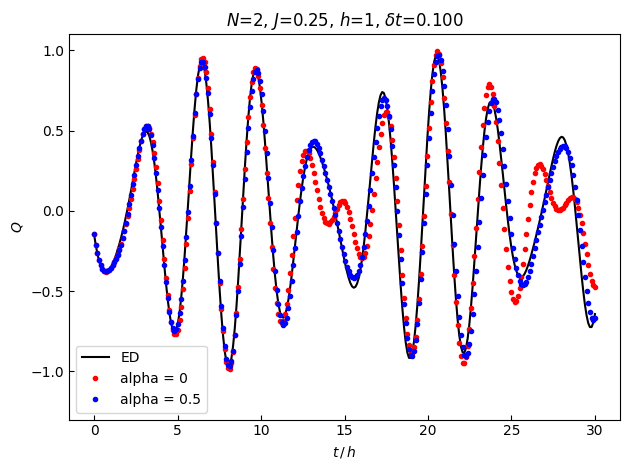

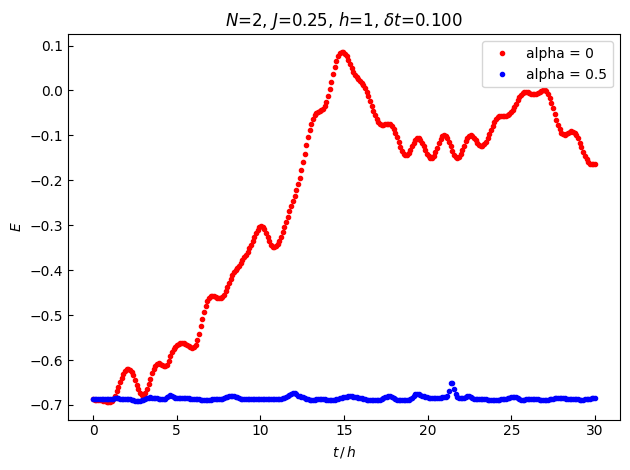

In [36]:
 
    
times_VQS = np.linspace(0.0,time_max,num_steps)
times_ED = np.linspace(0.0,time_max,len(mag_list_ED))
step = 1
plt.figure(1)
plt.plot(times_ED,mag_list_ED,label='ED',color='black')
plt.plot(times_VQS[::step],mag_list_baseline[::step],'.',label='alpha = 0',color='r')
plt.plot(times_VQS[::step],mag_list_05[::step],'.',label='alpha = 0.5',color='b')

plt.title(f'$N$={num_qubits}, $J$={j_coupling}, $h$={h_coupling}, $\delta t$={time_max/num_steps:.3f}')
plt.xlabel('$t\, / \, h$')
plt.ylabel('$Q$')
# plt.xlim([0,0.1])
plt.ylim([-1.3,1.1])
plt.legend()
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()

plt.figure(2)
plt.plot(times_VQS[::step],E_list_baseline[::step],'.',label='alpha = 0',color='r')
plt.plot(times_VQS[::step],E_list_05[::step],'.',label='alpha = 0.5',color='b')
plt.title(f'$N$={num_qubits}, $J$={j_coupling}, $h$={h_coupling}, $\delta t$={time_max/num_steps:.3f}')
plt.xlabel('$t\, / \, h$')
plt.ylabel('$E$')
# plt.xlim([0,0.1])
 
plt.legend()
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()

Compare differences

/home/zhelunli/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zhelunli/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


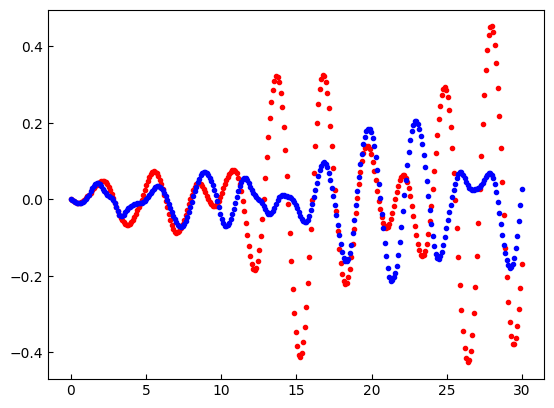

In [42]:
plt.plot(times_VQS,mag_list_ED-mag_list_baseline,'.',label='alpha = 0',color='r')
plt.plot(times_VQS,mag_list_ED-mag_list_05,'.',label='alpha = 0.5',color='b')